<a href="https://colab.research.google.com/github/abstractguy/crypto_bot/blob/master/crypto_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cryptocurrency trading bot.

Hardcoded parameters.

In [0]:
symbol = 'BTCUSDT'
period = '15 minutes ago UTC'
interval = '1m'
api_key = 'yoyoyo'
api_secret = 'yeyeye'

Installs.

In [2]:
!pip install python-binance --upgrade --no-cache-dir

Requirement already up-to-date: python-binance in /usr/local/lib/python3.6/dist-packages (0.7.5)


Library imports.

In [0]:
%matplotlib inline

from binance.client import Client
from binance.enums import *
from binance.exceptions import BinanceAPIException
from time import sleep

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Function definitions.

In [0]:
def heikin_ashi(df):
    df = df.tz_localize(tz=None, ambiguous='infer')
    df = df[['Open', 'High', 'Low', 'Close']].copy().astype('float')
    heikin_ashi_df = pd.DataFrame(index=df.index.values, columns=['Open', 'High', 'Low', 'Close'])
    heikin_ashi_df['Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

    for i in range(len(df)):
        if i == 0:
            heikin_ashi_df.iat[0, 0] = df['Open'].iloc[0]
        else:
            heikin_ashi_df.iat[i, 0] = (heikin_ashi_df.iat[i - 1, 0] + heikin_ashi_df.iat[i - 1, 3]) / 2

    heikin_ashi_df['High'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['High']).max(axis=1)
    heikin_ashi_df['Low'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['Low']).min(axis=1)

    return heikin_ashi_df

def download_dataset(symbol=symbol):
    dataset_downloaded = \
        client.get_historical_klines(symbol=symbol, 
                                     interval=interval, 
                                     start_str=period)

    dataset_downloaded = pd.DataFrame(dataset_downloaded, 
                                      columns=['time', 
                                               'Open', 
                                               'High', 
                                               'Low', 
                                               'Close', 
                                               'Volume', 
                                               'Close time', 
                                               'Quote asset volume', 
                                               'Number of trades', 
                                               'Taker buy base asset volume', 
                                               'Taker buy quote asset volume', 
                                               'Ignore'])

    four_hours = 14400
    milliseconds = 1000

    dataset_downloaded['time'] = \
        dataset_downloaded['time'].apply(lambda timestamp: \
                                         datetime.datetime.fromtimestamp((timestamp / \
                                                                          milliseconds) - \
                                                                         four_hours))

    dataset_downloaded = dataset_downloaded[['time', 
                                             'Open', 
                                             'High', 
                                             'Low', 
                                             'Close', 
                                             'Volume', 
                                             'Number of trades']]

    dataset_downloaded.set_index('time', inplace=True)

    return dataset_downloaded

Download cryptocurrency symbol data.

In [5]:
client = Client(api_key, api_secret)
dataset_downloaded = download_dataset()
dataset_downloaded

,Open,High,Low,Close,Volume,Number of trades
time,,,,,,
2020-03-18 00:15:00,5383.05000000,5384.91000000,5382.02000000,5382.95000000,12.47245200,192
2020-03-18 00:16:00,5383.73000000,5383.73000000,5375.13000000,5376.30000000,26.35065800,264
2020-03-18 00:17:00,5376.20000000,5383.20000000,5375.00000000,5379.52000000,49.15164900,289
2020-03-18 00:18:00,5379.52000000,5381.13000000,5376.00000000,5381.13000000,30.61545900,214
2020-03-18 00:19:00,5381.13000000,5382.97000000,5377.22000000,5378.53000000,18.10331300,152
2020-03-18 00:20:00,5378.53000000,5378.91000000,5365.71000000,5367.00000000,48.59691000,466
2020-03-18 00:21:00,5367.56000000,5377.58000000,5366.64000000,5374.26000000,56.89480100,391
2020-03-18 00:22:00,5373.80000000,5378.37000000,5372.17000000,5377.38000000,14.59555800,201
2020-03-18 00:23:00,5377.29000000,5385.00000000,5375.17000000,5384.91000000,26.86698900,186


Download testing area -->

<-- End of download testing area.

*** To avoid downloading multiple times, restart here. ***

In [6]:
dataset = dataset_downloaded.copy()
dataset

,Open,High,Low,Close,Volume,Number of trades
time,,,,,,
2020-03-18 00:15:00,5383.05000000,5384.91000000,5382.02000000,5382.95000000,12.47245200,192
2020-03-18 00:16:00,5383.73000000,5383.73000000,5375.13000000,5376.30000000,26.35065800,264
2020-03-18 00:17:00,5376.20000000,5383.20000000,5375.00000000,5379.52000000,49.15164900,289
2020-03-18 00:18:00,5379.52000000,5381.13000000,5376.00000000,5381.13000000,30.61545900,214
2020-03-18 00:19:00,5381.13000000,5382.97000000,5377.22000000,5378.53000000,18.10331300,152
2020-03-18 00:20:00,5378.53000000,5378.91000000,5365.71000000,5367.00000000,48.59691000,466
2020-03-18 00:21:00,5367.56000000,5377.58000000,5366.64000000,5374.26000000,56.89480100,391
2020-03-18 00:22:00,5373.80000000,5378.37000000,5372.17000000,5377.38000000,14.59555800,201
2020-03-18 00:23:00,5377.29000000,5385.00000000,5375.17000000,5384.91000000,26.86698900,186


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



,Open,High,Low,Close
2020-03-18 00:15:00,5383.05,5384.910000,5382.020000,5383.2325
2020-03-18 00:16:00,5383.14,5383.730000,5375.130000,5379.7225
2020-03-18 00:17:00,5381.43,5383.200000,5375.000000,5378.4800
2020-03-18 00:18:00,5379.96,5381.130000,5376.000000,5379.4450
2020-03-18 00:19:00,5379.7,5382.970000,5377.220000,5379.9625
2020-03-18 00:20:00,5379.83,5379.831484,5365.710000,5372.5375
2020-03-18 00:21:00,5376.18,5377.580000,5366.640000,5371.5100
2020-03-18 00:22:00,5373.85,5378.370000,5372.170000,5375.4300
2020-03-18 00:23:00,5374.64,5385.000000,5374.638623,5380.5925
2020-03-18 00:24:00,5377.62,5389.350000,5377.615562,5385.4475


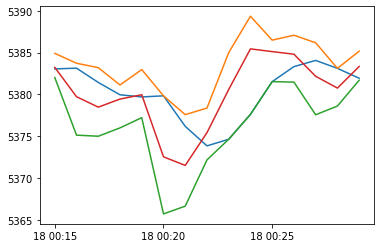

In [7]:
heikin_ashi_dataset = heikin_ashi(dataset)
plt.plot(heikin_ashi_dataset)
heikin_ashi_dataset

In [8]:
fig = go.Figure(data=[go.Candlestick(x=heikin_ashi_dataset.index.to_series(), 
                                     open=heikin_ashi_dataset['Open'], 
                                     high=heikin_ashi_dataset['High'], 
                                     low=heikin_ashi_dataset['Low'], 
                                     close=heikin_ashi_dataset['Close'])])

fig.show()

2020-03-18 00:15:00    1
2020-03-18 00:16:00    0
2020-03-18 00:17:00    0
2020-03-18 00:18:00    0
2020-03-18 00:19:00    1
2020-03-18 00:20:00    0
2020-03-18 00:21:00    0
2020-03-18 00:22:00    1
2020-03-18 00:23:00    1
2020-03-18 00:24:00    1
2020-03-18 00:25:00    1
2020-03-18 00:26:00    1
2020-03-18 00:27:00    0
2020-03-18 00:28:00    0
2020-03-18 00:29:00    1
dtype: int64

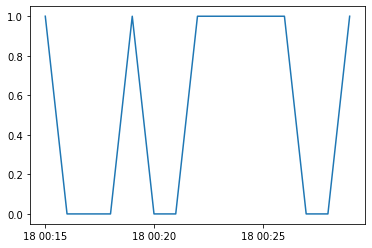

In [9]:
latent_trend = ((heikin_ashi_dataset['Close'] - heikin_ashi_dataset['Open']) > 0).astype(int)
plt.plot(latent_trend)
latent_trend

In [0]:
#list(filter(lambda x: float(x['free']) != 0.0, client.get_account()['balances']))

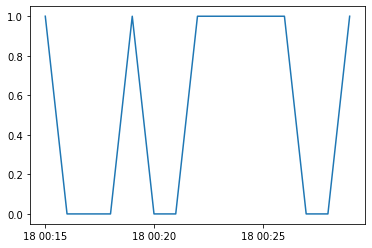

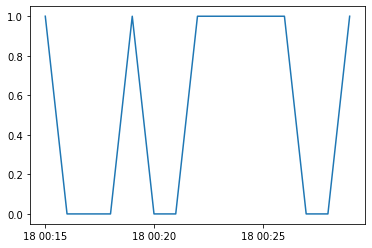

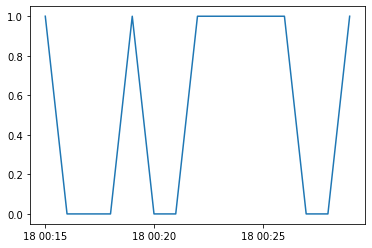

In [0]:
position = 'buy'

while True:
    sleep(30)
    dataset = download_dataset(symbol=symbol)
    dataset = heikin_ashi(dataset)
    latent_trend = ((heikin_ashi_dataset['Close'] - heikin_ashi_dataset['Open']) > 0).astype(int)
    plt.plot(latent_trend)
    plt.show()

    if latent_trend[-1] == 1 and latent_trend[-2] == 1 and position == 'sell':
        position = 'buy'
        client.create_order(symbol=symbol, 
                            side=Client.SIDE_BUY, 
                            type=Client.ORDER_TYPE_MARKET, 
                            quantity=10, 
                            recvWindow=1000)

    elif latent_trend[-1] == 0 and latent_trend[-2] == 0 and position == 'buy':
        position = 'sell'
        client.create_order(symbol=symbol, 
                            side=Client.SIDE_SELL, 
                            type=Client.ORDER_TYPE_MARKET, 
                            quantity=0.0013, 
                            recvWindow=1000)